# Image Classification with CNN

## Content
1. MNIST Image Classifier with CNN
  1. Dataset Loading
  1. Visualise one Data Point
  1. Transformation
  1. Designing Model Architecture
  1. Train the model
  1. Evaluate the model
  1. Plot the matrices
  1. Visualise the predictions
  1. Save the model
1. Cat vs Dogs Image Classifier with CNN
  1. Dataset Loading
  1. Visualise one Data point
  1. Transformations
  1. Designing Model Architecture
  1. Train the model
  1. Evaluate the model
  1. Plot the matrices
  1. Visualise the predictions
  1. Save the model
  



# MNIST Classifier

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import random
import numpy as np

## Dataset exploration

In [4]:
# Download the testing dataset
# https://pytorch.org/vision/stable/datasets.html
dataset = datasets.MNIST(root='./data', train=False, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5116737.93it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134310.18it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:06<00:00, 243545.52it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1896707.36it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
# Get one instance of the dataset
images, labels = next(iter(dataset))

<PIL.Image.Image image mode=L size=28x28 at 0x7ABBC3695420>
(28, 28)
7


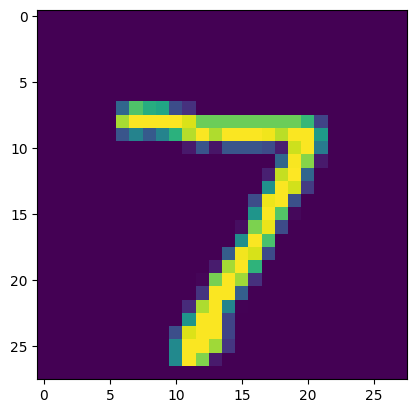

In [6]:
# See the data and labels
print(images)
print(np.array(images).shape)
plt.imshow(images)
print(labels)

In [7]:
print(labels)

7


## Device and Hyper Parameters

In [8]:
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [10]:
# Hyperparameters
batch_size = 64
learning_rate = 0.001
num_epochs = 10

## Data Transformations

In [11]:
# Data Transformations
# https://pytorch.org/vision/stable/transforms.html
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0,), (1,))
])

## Load Dataset

In [12]:
# Load the Training Dataset
dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Define training size (80%)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

# Split the training dataset to training and validation
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Load the test dataset
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [13]:
# Create Data Loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


## Model Architecture

In [14]:
# Simple CNN Model
# https://madebyollin.github.io/convnet-calculator/
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x): # Input size: 28  x 28 x 1
        x = torch.relu(self.conv1(x))   # 28 x 28 x32
        x = self.pool(x)                # 14 x 14 x32
        x = torch.relu(self.conv2(x))   # 14 x 14 x64
        x = self.pool(x)                # 7  x 7  x64
        x = x.view(-1, 64 * 7 * 7)      # 3136
        x = torch.relu(self.fc1(x))     # 128
        x = self.dropout(x)             # 128
        x = self.fc2(x)                 # 10
        return x

# Instantiate the model, define the loss function and the optimizer
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Explore the Model outputs


In [15]:
# Get one batch from train_loader
images, labels = next(iter(train_loader))

In [18]:
# Get a prediction
prediction = model(images.to(device))

In [19]:
# Explore prediction
prediction.data.shape

torch.Size([64, 10])

In [20]:
prediction.data[0]

tensor([-0.0431, -0.0253, -0.0771, -0.0049, -0.0312,  0.0238, -0.0318,  0.0132,
        -0.0410,  0.0057], device='cuda:0')

In [21]:
torch.argmax(prediction.data,1)

tensor([5, 7, 7, 7, 7, 3, 3, 9, 1, 7, 5, 9, 5, 5, 7, 5, 9, 3, 7, 9, 5, 7, 7, 9,
        4, 5, 7, 3, 5, 7, 7, 7, 7, 9, 5, 3, 5, 5, 7, 7, 3, 7, 7, 5, 5, 3, 3, 7,
        7, 7, 7, 5, 5, 5, 7, 7, 3, 4, 7, 5, 7, 5, 3, 7], device='cuda:0')

In [22]:
torch.max(prediction.data, 1)

torch.return_types.max(
values=tensor([ 0.0238,  0.0295,  0.0418,  0.0337,  0.0287,  0.0235,  0.0335,  0.0209,
         0.0212,  0.0403,  0.0278,  0.0475,  0.0318,  0.0648,  0.0386,  0.0373,
         0.0308,  0.0031,  0.0227,  0.0330,  0.0287,  0.0134,  0.0325,  0.0144,
         0.0352,  0.0550,  0.0467,  0.0207,  0.0150,  0.0232,  0.0265,  0.0676,
         0.0441,  0.0419,  0.0272,  0.0216,  0.0397,  0.0197,  0.0299,  0.0393,
         0.0262,  0.0567,  0.0372,  0.0245,  0.0458,  0.0030,  0.0162,  0.0354,
         0.0201,  0.0373,  0.0409,  0.0271,  0.0378,  0.0165, -0.0008,  0.0144,
         0.0061,  0.0408,  0.0278,  0.0128,  0.0116,  0.0521,  0.0078, -0.0004],
       device='cuda:0'),
indices=tensor([5, 7, 7, 7, 7, 3, 3, 9, 1, 7, 5, 9, 5, 5, 7, 5, 9, 3, 7, 9, 5, 7, 7, 9,
        4, 5, 7, 3, 5, 7, 7, 7, 7, 9, 5, 3, 5, 5, 7, 7, 3, 7, 7, 5, 5, 3, 3, 7,
        7, 7, 7, 5, 5, 5, 7, 7, 3, 4, 7, 5, 7, 5, 3, 7], device='cuda:0'))

## Training the Model

In [23]:
# Define the Training function
def train(model, train_loader, val_loader, criterion, optimizer, num_epochs):

  # Placeholders for train_loss, val_loss, train_accuracy, val_accuracy
  train_losses = []
  val_losses = []
  train_accuracies = []
  val_accuracies = []

  # Iterate over number of epochs
  for epoch in range(num_epochs):

    # Set the model to training mode
    model.train()

    # Placeholder for running loss, training accuracy
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Iterate over items in train_loader
    for images, labels in train_loader:

      # Transfer data and labels to device
      images, labels = images.to(device), labels.to(device)

      # Zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(images)

      # Calculate loss
      loss = criterion(outputs, labels)

      # Backward pass and optimise
      loss.backward()
      optimizer.step()

      # Update the running loss
      running_loss += loss.item()

      # update the running accuracy
      predicted = torch.argmax(outputs.data, 1)
      total_train += labels.size(0)
      correct_train += (predicted == labels).sum().item()

    # Update the training loss and accuracy and append to train_loss & train_accuracy
    train_loss = running_loss / len(train_loader)
    train_accuracy = 100 * correct_train / total_train
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation ----
    # Set the model to evaluation mode
    model.eval()

    # Placeholder for running loss, validation accuracy
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
      # Iterate over items in val_loader
      for images, labels in val_loader:
        # Transfer data and labels to device
        images, labels = images.to(device), labels.to(device)

        # get outputs from model
        outputs = model(images)

        # get loss
        loss = criterion(outputs, labels)

        # calculate and update loss and accuracy
        running_val_loss += loss.item()

        predicted = torch.argmax(outputs.data, 1)
        total_val += labels.size(0)
        correct_val += (predicted == labels).sum().item()

    val_loss = running_val_loss / len(val_loader)
    val_accuracy = 100 * correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Print epoch matrics
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%')

  # return the model, and matrices
  return model, train_losses, val_losses, train_accuracies, val_accuracies


# utilise train function to train the model
model, train_losses, val_losses, train_accuracies, val_accuracies = train(model, train_loader, val_loader, criterion, optimizer, num_epochs)

Epoch [1/10], Train Loss: 0.3197, Val Loss: 0.0773, Train Acc: 90.12%, Val Acc: 97.54%
Epoch [2/10], Train Loss: 0.1112, Val Loss: 0.0528, Train Acc: 96.62%, Val Acc: 98.41%
Epoch [3/10], Train Loss: 0.0827, Val Loss: 0.0387, Train Acc: 97.57%, Val Acc: 98.84%
Epoch [4/10], Train Loss: 0.0691, Val Loss: 0.0376, Train Acc: 98.01%, Val Acc: 98.85%
Epoch [5/10], Train Loss: 0.0587, Val Loss: 0.0343, Train Acc: 98.24%, Val Acc: 98.95%
Epoch [6/10], Train Loss: 0.0488, Val Loss: 0.0356, Train Acc: 98.49%, Val Acc: 98.89%
Epoch [7/10], Train Loss: 0.0439, Val Loss: 0.0370, Train Acc: 98.64%, Val Acc: 98.97%
Epoch [8/10], Train Loss: 0.0390, Val Loss: 0.0341, Train Acc: 98.78%, Val Acc: 99.04%
Epoch [9/10], Train Loss: 0.0338, Val Loss: 0.0352, Train Acc: 98.98%, Val Acc: 99.01%
Epoch [10/10], Train Loss: 0.0308, Val Loss: 0.0336, Train Acc: 98.98%, Val Acc: 99.08%


## Evaluate Model

In [24]:
# Define Evaluate Function
def evaluate(model, test_loader):

    # Set the model to evaluate mode
    model.eval()

    with torch.no_grad():

        # Placeholders for correct and totals
        correct = 0
        total = 0

        # Iterate over test_loarder
        for images, labels in test_loader:

          # Transfer data and labels to device
          images, labels = images.to(device), labels.to(device)

          # Get output
          outputs = model(images)
          predicted = torch.argmax(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

          test_accuracy = 100 * correct / total

        print(f'Accuracy of the model on the test images: {test_accuracy}%')

        return test_accuracy

# Utilise the evaluate method to get testing accuracy
test_accuracy = evaluate(model, test_loader)

Accuracy of the model on the test images: 99.1%


## Plot Matrices

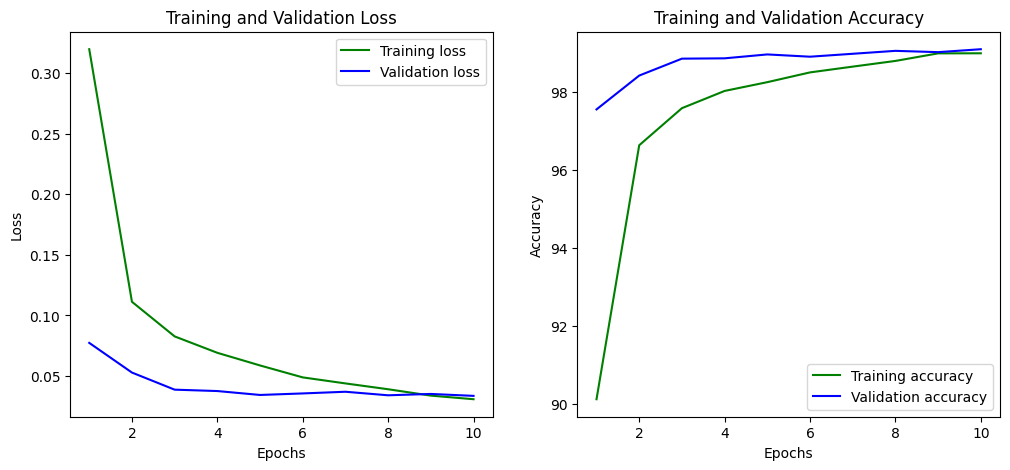

In [25]:
# Plot the matrices
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'g', label='Training loss')
    plt.plot(epochs, val_losses, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'g', label='Training accuracy')
    plt.plot(epochs, val_accuracies, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Utilise the plot function to plot matrices
plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

## Visualise predictions

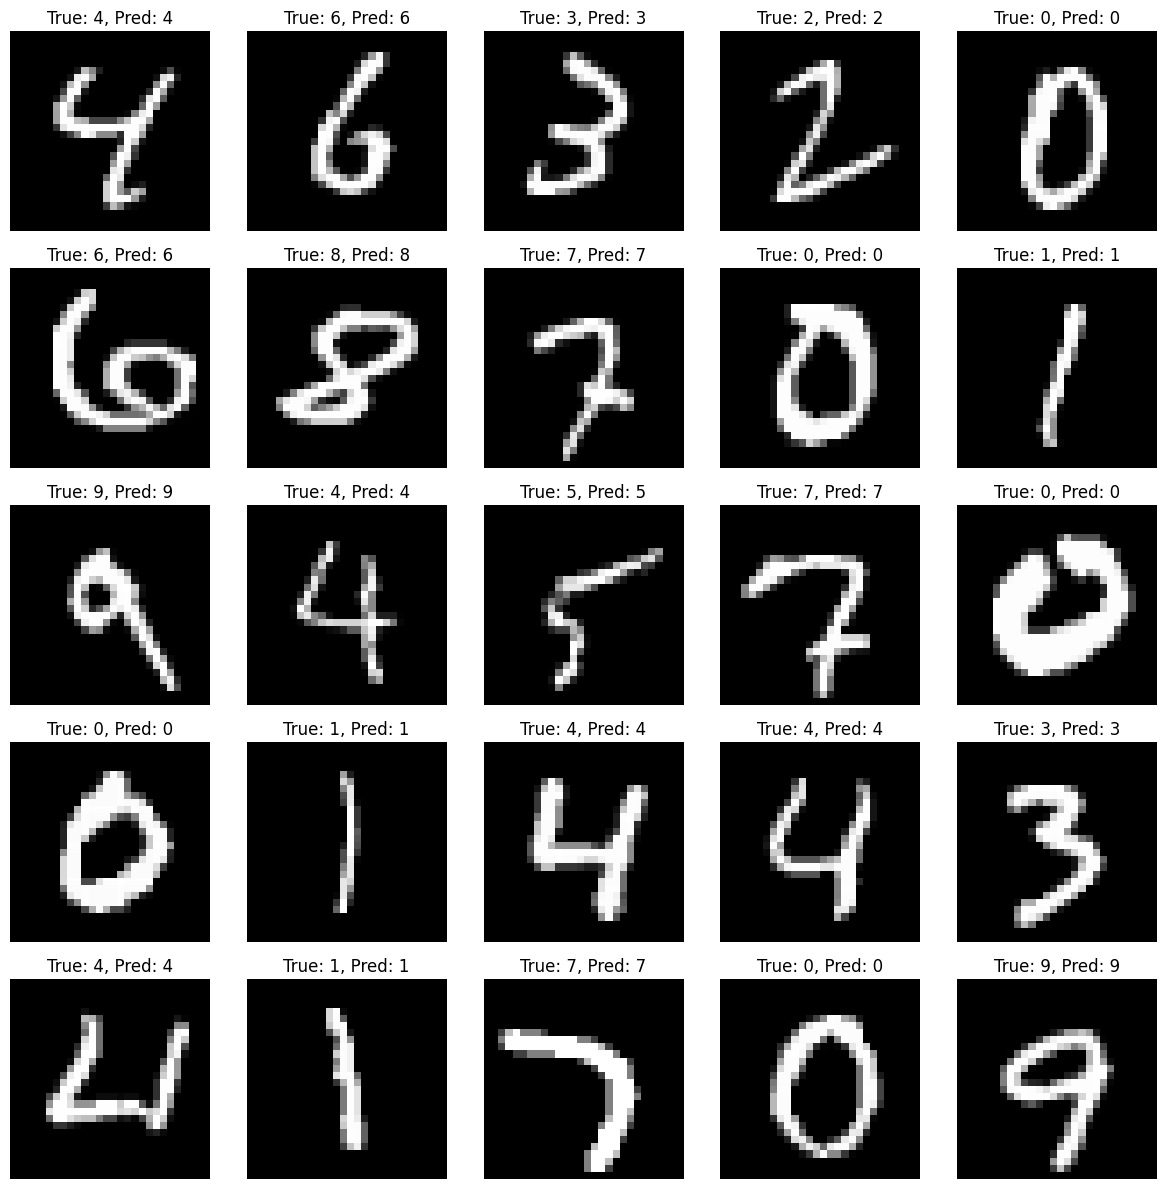

In [26]:
# Function to visualize 25 random instances from the test dataset
def visualize_predictions(model, test_loader):
    model.eval()
    with torch.no_grad():
        images, labels = next(iter(test_loader))
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Select 25 random samples
        indices = random.sample(range(len(images)), 25)
        selected_images = images[indices]
        selected_labels = labels[indices]
        selected_predictions = predicted[indices]

        # Plot the images with ground truth and predictions
        fig, axes = plt.subplots(5, 5, figsize=(12, 12))
        axes = axes.flatten()
        for i in range(25):
            img = selected_images[i].cpu().numpy().squeeze()
            true_label = selected_labels[i].cpu().item()
            predicted_label = selected_predictions[i].cpu().item()

            axes[i].imshow(img, cmap='gray')
            axes[i].set_title(f'True: {true_label}, Pred: {predicted_label}')
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

# Visualize 25 random instances from the test dataset
visualize_predictions(model, test_loader)

## Save the model

In [27]:
# Save the model
torch.save(model.state_dict(), 'mnist_cnn_model.pth')

# Cat vs Dogs

In [28]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split, Subset
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np


## Dataset Loading

In [ ]:
# !wget "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" -O "/content/drive/MyDrive/CSC6203/Data/kagglecatsanddogs_5340.zip"
# !unzip "/content/drive/MyDrive/CSC6203/Data/kagglecatsanddogs_5340.zip" -d "/content/drive/MyDrive/CSC6203/Data/"

In [29]:
# Define paths to the data directory
data_dir = '/content/drive/MyDrive/CSC6203/Data/PetImages_lite'

# Load the dataset
dataset = ImageFolder(root=data_dir)

## Explore dataset

In [30]:
# Get one data point
img, label = next(iter(dataset))

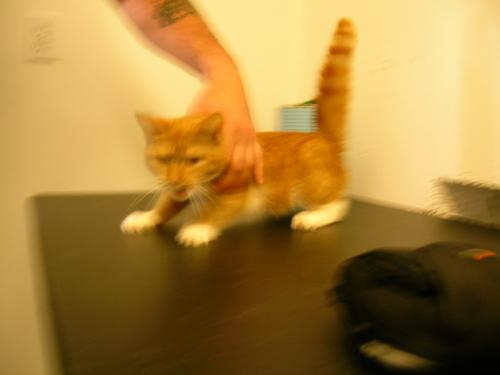

In [31]:
# See the data and labels
img

In [32]:
label

0

## Set device and hyperparameters

In [40]:
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
batch_size = 32
learning_rate = 0.001
num_epochs = 5
images_per_class = 200

## Data Transformation

In [34]:
# Data Transformations
# https://pytorch.org/vision/stable/transforms.html
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

## Load Dataset

In [35]:
# Load the dataset
dataset = ImageFolder(root=data_dir, transform=transform)

In [36]:
# Create a balanced dataset with `images_per_class` images from each class
class_indices = defaultdict(list)
for idx, (img, label) in enumerate(dataset):
    class_indices[label].append(idx)

balanced_indices = []
for indices in class_indices.values():
    balanced_indices.extend(indices[:images_per_class])

balanced_dataset = Subset(dataset, balanced_indices)

In [37]:
# Split dataset into training, validation, and testing sets to 70% 20% 10%
train_size = int(0.7 * len(balanced_dataset))
val_size = int(0.2 * len(balanced_dataset))
test_size = len(balanced_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(balanced_dataset, [train_size, val_size, test_size])

In [38]:
# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

## Model Architecture

In [39]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 16 * 16, 512)
        self.fc2 = nn.Linear(512, 2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):             # 128 x 128 x 3
        x = torch.relu(self.conv1(x)) # 128 x 128 x 32
        x = self.pool(x)              # 64 x 64 x 32
        x = torch.relu(self.conv2(x)) # 64 x 64 x 64
        x = self.pool(x)              # 32 x 32 x 64
        x = torch.relu(self.conv3(x)) # 32 x 32 x 128
        x = self.pool(x)              # 16 x 16 x 128
        x = x.view(-1, 128 * 16 * 16) # 32768
        x = torch.relu(self.fc1(x))   # 512
        x = self.dropout(x)           # 512
        x = self.fc2(x)               # 2
        return x

# Initialize the model, loss function, and optimizer
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Explore the model outputs

In [41]:
# Get one batch from train_loader
images, labels = next(iter(train_loader))

In [42]:
# Get a prediction
prediction = model(images.to(device))

In [44]:
prediction.data

tensor([[-0.0148, -0.0145],
        [ 0.0283,  0.0331],
        [ 0.0426,  0.0605],
        [ 0.0163,  0.0070],
        [-0.0127, -0.0100],
        [ 0.0022,  0.0175],
        [ 0.0466, -0.0188],
        [-0.0138,  0.0040],
        [ 0.0357,  0.0240],
        [ 0.0155,  0.0545],
        [-0.0137,  0.0124],
        [ 0.0036,  0.0011],
        [-0.0036,  0.0176],
        [ 0.0097, -0.0090],
        [ 0.0371,  0.0439],
        [ 0.0080,  0.0477],
        [ 0.0008,  0.0080],
        [ 0.0252,  0.0378],
        [ 0.0304,  0.0021],
        [ 0.0029,  0.0394],
        [-0.0116,  0.0464],
        [-0.0424,  0.0378],
        [-0.0166,  0.0112],
        [ 0.0238, -0.0016],
        [ 0.0049,  0.0437],
        [ 0.0525,  0.0256],
        [ 0.0162,  0.0357],
        [-0.0178,  0.0327],
        [ 0.0044,  0.0399],
        [ 0.0040,  0.0541],
        [-0.0241,  0.0415],
        [-0.0104,  0.0143]], device='cuda:0')

In [43]:
torch.argmax(prediction.data,1)

tensor([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 1, 1, 1, 1], device='cuda:0')

## Training the model

In [45]:
# Placeholders for losses and accuracies
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []



In [46]:
# Function to calculate accuracy
def calculate_accuracy(loader, model):
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            predicted = torch.argmax(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

In [47]:
# Iterate over each epoch
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    # Calculate accuracy
    train_acc = calculate_accuracy(train_loader, model)
    val_acc = calculate_accuracy(val_loader, model)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%')


Epoch [1/5], Train Loss: 0.8032, Val Loss: 0.6903, Train Acc: 49.64%, Val Acc: 53.75%
Epoch [2/5], Train Loss: 0.6946, Val Loss: 0.6954, Train Acc: 50.36%, Val Acc: 47.50%
Epoch [3/5], Train Loss: 0.6929, Val Loss: 0.6982, Train Acc: 68.57%, Val Acc: 47.50%
Epoch [4/5], Train Loss: 0.6762, Val Loss: 0.7795, Train Acc: 59.29%, Val Acc: 46.25%
Epoch [5/5], Train Loss: 0.6530, Val Loss: 0.7083, Train Acc: 61.43%, Val Acc: 48.75%


## Evaluate Model

In [48]:
# Testing evaluation
model.eval()
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        predicted = torch.argmax(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_loss /= len(test_loader)
test_accuracy = 100 * correct / total

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Test Loss: 0.7349, Test Accuracy: 47.50%


## Plot matrices

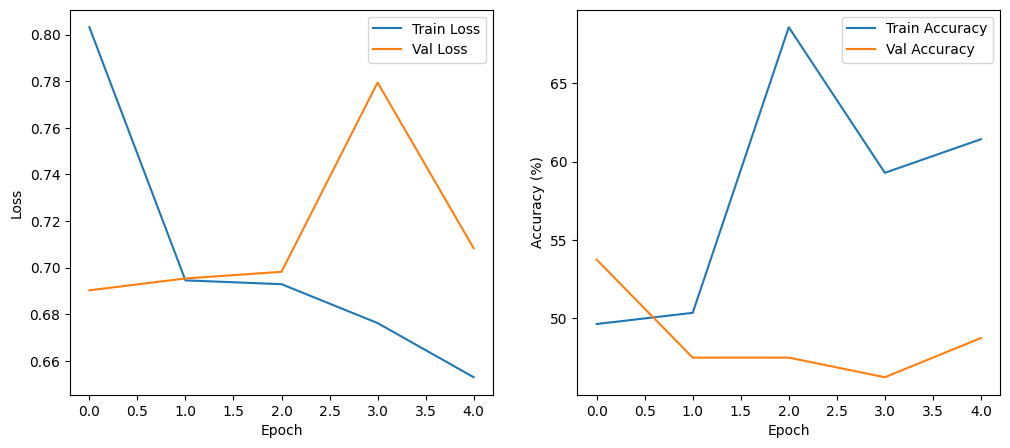

In [49]:
# Plot the training and validation losses
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()

## Visualise Predictions

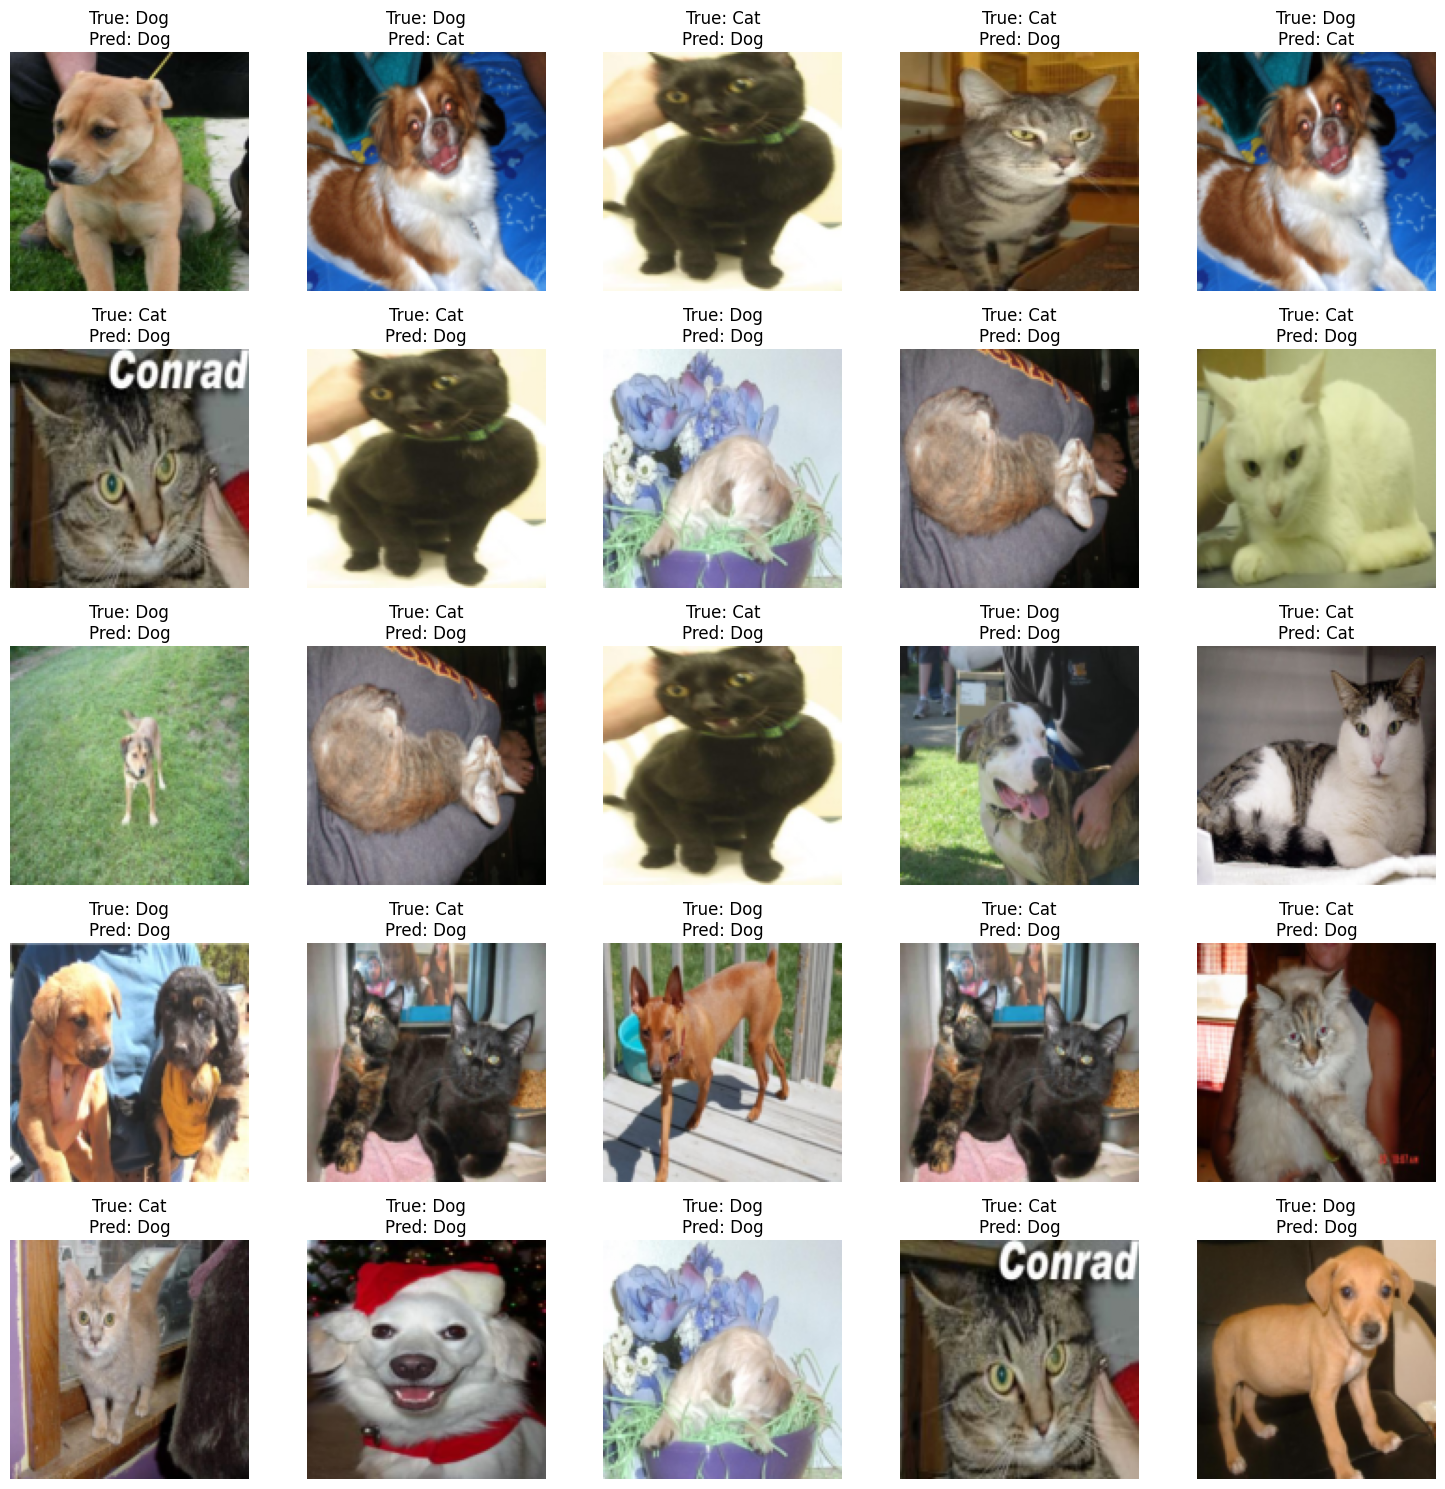

In [50]:
# Visualize 25 random instances from the testing dataset with ground truth and predicted values
def denormalize(img):
    img = img * torch.tensor([0.5, 0.5, 0.5]).view(3, 1, 1) + torch.tensor([0.5, 0.5, 0.5]).view(3, 1, 1)
    return img

fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.ravel()

for i in range(25):
    index = np.random.randint(0, len(test_dataset))
    image, label = test_dataset[index]
    image = image.unsqueeze(0).to(device)
    output = model(image)
    predicted = torch.argmax(output.data, 1)
    image = image.cpu().squeeze(0)
    image = denormalize(image).permute(1, 2, 0).numpy()

    axes[i].imshow(image)
    axes[i].set_title(f'True: {dataset.classes[label]}\nPred: {dataset.classes[predicted.item()]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Save the model

In [51]:
# Save the model
torch.save(model.state_dict(), 'cats_vs_dogs_cnn_model.pth')